## 1) Загрузка данных

Описание блока:

В этом блоке выполняется загрузка исходных таблиц в памяти: transaction_fraud_data.parquet → DataFrame df_transactions и вспомогательной таблицы курсов валют df_currency. Проверяется успешность загрузки (количество строк), типы данных и первичный осмотр (head).

Ключевые результаты:

* Файлы успешно загружены и сконвертированы в DataFrame df_transactions и df_currency.
* Выполнен базовый check: len(df_.....) совпадает с ожидаемым (проверка merge прошла), первые строчки таблиц корректно отображаются.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


df_transactions = pd.read_parquet('transaction_fraud_data.parquet', engine='fastparquet')
df_currency = pd.read_parquet('historical_currency_exchange.parquet', engine='fastparquet')

In [2]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 27 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   transaction_id                        object        
 1   customer_id                           object        
 2   card_number                           int64         
 3   timestamp                             datetime64[us]
 4   vendor_category                       object        
 5   vendor_type                           object        
 6   vendor                                object        
 7   amount                                float64       
 8   currency                              object        
 9   country                               object        
 10  city                                  object        
 11  city_size                             object        
 12  card_type                             object        
 13  is_card_pres

In [3]:
df_transactions.describe(include='all')

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,is_fraud,last_hour_activity.num_transactions,last_hour_activity.total_amount,last_hour_activity.unique_merchants,last_hour_activity.unique_countries,last_hour_activity.max_single_amount
count,7483766,7483766,7.483766e+06,7483766,7483766,7483766,7483766,7.483766e+06,7483766,7483766,...,7483766,7483766,7483766,7483766,7483766,7.483766e+06,7.483766e+06,7.483766e+06,7.483766e+06,7.483766e+06
unique,7477306,4869,NaN,NaN,8,17,105,NaN,11,12,...,7477187,2,2,2,2,NaN,NaN,NaN,NaN,NaN
top,TX_706baadf,CUST_91730,NaN,NaN,Healthcare,online,Chegg,NaN,EUR,Nigeria,...,193.254.92.164,False,False,False,False,NaN,NaN,NaN,NaN,NaN
freq,3,4015,NaN,NaN,936770,1401650,156105,NaN,1065751,849840,...,3,5073605,5611803,5554103,5989047,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.222100e+15,2024-10-15 12:36:38.052469,NaN,NaN,NaN,4.792468e+04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.091429e+02,1.991719e+07,8.002226e+01,1.066260e+01,1.726432e+06
min,NaN,NaN,3.700086e+14,2024-09-30 00:00:01.034820,NaN,NaN,NaN,1.000000e-02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.454232e-02,0.000000e+00,0.000000e+00,1.454232e-02
25%,NaN,NaN,4.004400e+15,2024-10-07 18:08:27.325326,NaN,NaN,NaN,3.635300e+02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.050000e+02,3.367823e+06,6.300000e+01,1.100000e+01,8.015712e+05
50%,NaN,NaN,5.010745e+15,2024-10-15 12:46:31.739295,NaN,NaN,NaN,1.177450e+03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.920000e+02,1.017851e+07,9.500000e+01,1.200000e+01,1.235738e+06
75%,NaN,NaN,5.999914e+15,2024-10-23 07:37:00.969509,NaN,NaN,NaN,2.242953e+04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.060000e+02,2.273432e+07,1.040000e+02,1.200000e+01,2.290742e+06
max,NaN,NaN,6.999728e+15,2024-10-30 23:59:59.101885,NaN,NaN,NaN,6.253153e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.962000e+03,1.072915e+09,1.050000e+02,1.200000e+01,6.253153e+06


In [4]:
df_transactions.isna().sum()

transaction_id                          0
customer_id                             0
card_number                             0
timestamp                               0
vendor_category                         0
vendor_type                             0
vendor                                  0
amount                                  0
currency                                0
country                                 0
city                                    0
city_size                               0
card_type                               0
is_card_present                         0
device                                  0
channel                                 0
device_fingerprint                      0
ip_address                              0
is_outside_home_country                 0
is_high_risk_vendor                     0
is_weekend                              0
is_fraud                                0
last_hour_activity.num_transactions     0
last_hour_activity.total_amount   

In [5]:
df_currency.head()

,date,AUD,BRL,CAD,EUR,GBP,JPY,MXN,NGN,RUB,SGD,USD
0,2024-09-30,1.443654,5.434649,1.351196,0.895591,0.747153,142.573268,19.694724,1668.736400,94.133735,1.280156,1
1,2024-10-01,1.442917,5.444170,1.352168,0.897557,0.746956,143.831429,19.667561,1670.694524,92.898519,1.284352,1
2,2024-10-02,1.449505,5.425444,1.348063,0.903056,0.752241,143.806861,19.606748,1669.653006,94.583198,1.286983,1
3,2024-10-03,1.456279,5.442044,1.351451,0.906018,0.754584,146.916773,19.457701,1670.097873,95.655442,1.294391,1
4,2024-10-04,1.460930,5.477788,1.355260,0.906452,0.761891,146.592323,19.363467,1649.763738,94.755337,1.296800,1


In [6]:
df_currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    31 non-null     datetime64[ns]
 1   AUD     31 non-null     float64       
 2   BRL     31 non-null     float64       
 3   CAD     31 non-null     float64       
 4   EUR     31 non-null     float64       
 5   GBP     31 non-null     float64       
 6   JPY     31 non-null     float64       
 7   MXN     31 non-null     float64       
 8   NGN     31 non-null     float64       
 9   RUB     31 non-null     float64       
 10  SGD     31 non-null     float64       
 11  USD     31 non-null     int64         
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 3.0 KB


In [7]:
df_currency.describe(include='all')

,date,AUD,BRL,CAD,EUR,GBP,JPY,MXN,NGN,RUB,SGD,USD
count,31,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,2024-10-15 00:00:00,1.486451,5.599606,1.373282,0.916183,0.764806,149.313721,19.650422,1640.017070,96.003479,1.308041,1.0
min,2024-09-30 00:00:00,1.442917,5.425444,1.348063,0.895591,0.746956,142.573268,19.263497,1619.450022,92.898519,1.280156,1.0
25%,2024-10-07 12:00:00,1.475624,5.486880,1.360292,0.910902,0.762839,148.544161,19.360603,1630.708907,95.450875,1.303973,1.0
50%,2024-10-15 00:00:00,1.487595,5.625377,1.377943,0.916792,0.765915,149.168474,19.694724,1639.315783,95.922769,1.308048,1.0
75%,2024-10-22 12:00:00,1.499793,5.689843,1.382771,0.923870,0.769698,151.214272,19.894018,1643.959480,96.868840,1.316452,1.0
max,2024-10-30 00:00:00,1.522229,5.761654,1.390965,0.927316,0.773928,153.800613,20.048756,1670.694524,97.501463,1.324596,1.0
std,NaN,0.021309,0.104725,0.013313,0.008551,0.006681,2.686216,0.283454,15.192761,1.073514,0.011290,0.0


In [8]:
df_currency.isna().sum()

date    0
AUD     0
BRL     0
CAD     0
EUR     0
GBP     0
JPY     0
MXN     0
NGN     0
RUB     0
SGD     0
USD     0
dtype: int64

## 2) Сопоставление курсов валют / обработка валют

Описание блока:

Преобразование таблицы df_currency в длинный формат (melt), вычисление rate_to_usd и merge с df_transactions для нормализации сумм в единую валюту при необходимости

Ключевые результаты:

* Таблица курсов переведена в длинный формат: колонки date, currency, rate_to_usd
* Результат merge прошёл успешно — df_transactions и df_currency объединены по дате/валюте (проверка len(df) == len(df_transactions) пройдена).

In [9]:
df_transactions['date'] = pd.to_datetime(df_transactions['timestamp']).dt.date
df_currency['date'] = pd.to_datetime(df_currency['date']).dt.date

In [10]:
df_currency = df_currency.melt(
    id_vars='date',
    var_name='currency',
    value_name='rate_to_usd'
)

In [11]:
df_currency.head()

,date,currency,rate_to_usd
0,2024-09-30,AUD,1.443654
1,2024-10-01,AUD,1.442917
2,2024-10-02,AUD,1.449505
3,2024-10-03,AUD,1.456279
4,2024-10-04,AUD,1.460930


In [12]:
df_currency.describe()

,rate_to_usd
count,341.000000
mean,174.312096
std,466.575053
min,0.746956
25%,1.000000
50%,1.487595
75%,95.319348
max,1670.694524


In [13]:
df = pd.merge(df_transactions, df_currency, on=['date', 'currency'], how='left')
df.head()

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,is_high_risk_vendor,is_weekend,is_fraud,last_hour_activity.num_transactions,last_hour_activity.total_amount,last_hour_activity.unique_merchants,last_hour_activity.unique_countries,last_hour_activity.max_single_amount,date,rate_to_usd
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,False,False,False,1197,3.349856e+07,105,12,1.925481e+06,2024-09-30,0.747153
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,True,False,True,509,2.011476e+07,100,12,5.149117e+06,2024-09-30,5.434649
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,False,False,False,332,3.916385e+07,97,12,1.852242e+06,2024-09-30,142.573268
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,False,False,False,764,2.201260e+07,105,12,2.055798e+06,2024-09-30,1.443654
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,False,False,True,218,4.827636e+06,88,12,1.157231e+06,2024-09-30,1668.736400


In [14]:
len(df) == len(df_transactions)

True

## 3) Проверка качества данных

Описание блока:
1. Стандартная валидация: df.info(), describe(include='all'), подсчёт пропусков isna().sum() и проверка типов колонок
2. Генерация дополнительных признаков (включая last_hour_activity и вложенную структуру)

Ключевые результаты:

* Были посчитаны пропуски по колонкам и выведена базовая статистика.
* Колонки с ожидаемыми типами обнаружены: is_fraud — булев, timestamp — datetime (или приведён к datetime), ключевые признаки присутствуют.
* Признаки last_hour_activity присутствуют и распакованы/использованы; lh_num_transactions, lh_total_amount, lh_unique_merchants, lh_unique_countries, lh_max_single_amount — пригодные 



In [15]:
df.isna().sum()

transaction_id                          0
customer_id                             0
card_number                             0
timestamp                               0
vendor_category                         0
vendor_type                             0
vendor                                  0
amount                                  0
currency                                0
country                                 0
city                                    0
city_size                               0
card_type                               0
is_card_present                         0
device                                  0
channel                                 0
device_fingerprint                      0
ip_address                              0
is_outside_home_country                 0
is_high_risk_vendor                     0
is_weekend                              0
is_fraud                                0
last_hour_activity.num_transactions     0
last_hour_activity.total_amount   

In [16]:
df['rate_to_usd'] = df['rate_to_usd']
df['amount_usd'] = df['amount'] / df['rate_to_usd']
df['amount_usd'].isna().sum()

np.int64(0)

In [17]:
df['hour_of_day'] = pd.to_datetime(df['timestamp']).dt.hour
df['day_of_week'] = pd.to_datetime(df['timestamp']).dt.day_name()
df.rename(
    columns={
        'last_hour_activity.num_transactions' : 'lh_num_transactions',
        'last_hour_activity.total_amount'     : 'lh_total_amount',
        'last_hour_activity.unique_merchants' : 'lh_unique_merchants',
        'last_hour_activity.unique_countries' : 'lh_unique_countries',
        'last_hour_activity.max_single_amount': 'lh_max_single_amount'
        }, 
        inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 32 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   transaction_id           object        
 1   customer_id              object        
 2   card_number              int64         
 3   timestamp                datetime64[us]
 4   vendor_category          object        
 5   vendor_type              object        
 6   vendor                   object        
 7   amount                   float64       
 8   currency                 object        
 9   country                  object        
 10  city                     object        
 11  city_size                object        
 12  card_type                object        
 13  is_card_present          bool          
 14  device                   object        
 15  channel                  object        
 16  device_fingerprint       object        
 17  ip_address               ob

## 4) Визуализации 

Описание блока:

Очень много визуализации и анализа. Надеемся найти закономерности фрода, паттерны, зависимости

is_fraud
False    80.027182
True     19.972818
Name: proportion, dtype: float64


/var/folders/3f/2yvqzm4x3fjfqpn8q5ggc9c40000gn/T/ipykernel_24757/2837938471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_fraud', data=df, palette=colors.values())


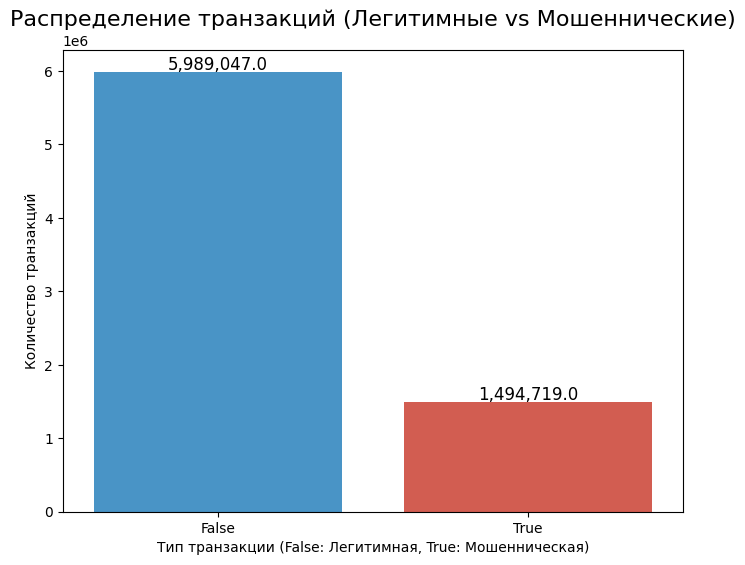

In [19]:
fraud_distribution = df['is_fraud'].value_counts(normalize=True) * 100
print(fraud_distribution)
plt.figure(figsize=(8, 6))
colors = {0: '#3498db', 1: '#e74c3c'}
ax = sns.countplot(x='is_fraud', data=df, palette=colors.values())
plt.title('Распределение транзакций (Легитимные vs Мошеннические)', fontsize=16)
plt.ylabel('Количество транзакций')
plt.xlabel('Тип транзакции (False: Легитимная, True: Мошенническая)')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

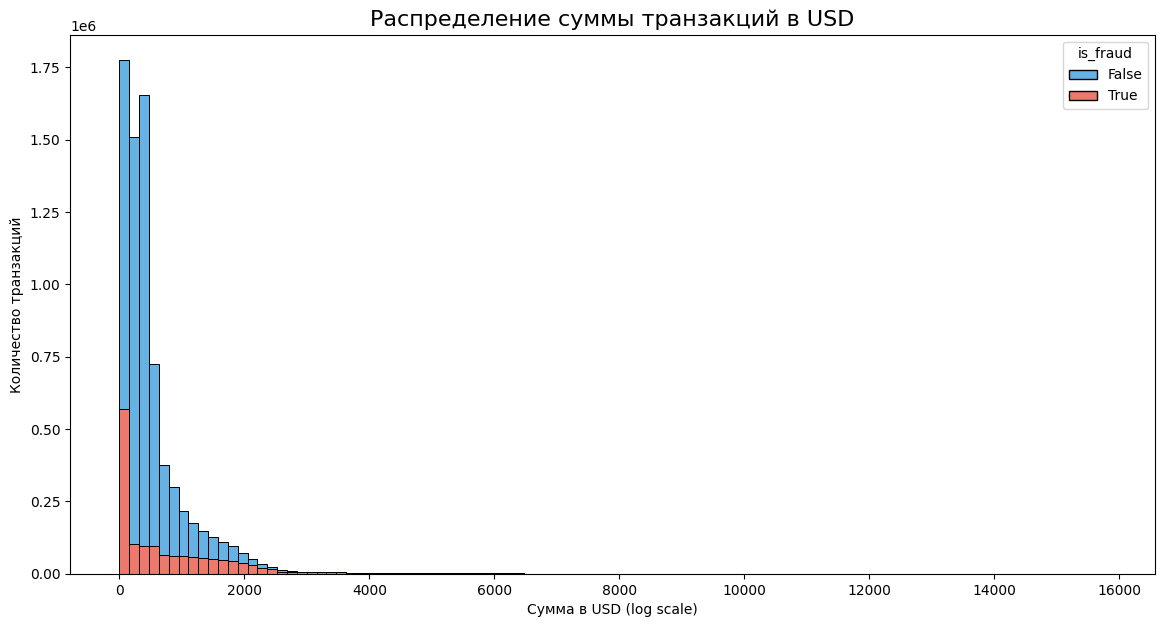

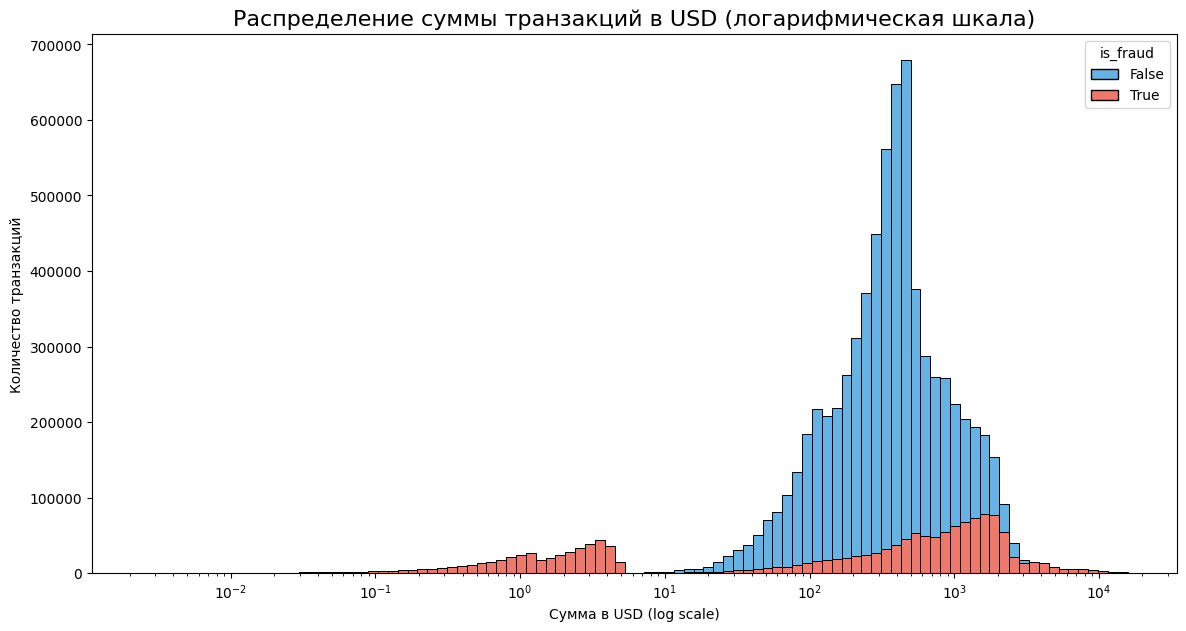

/var/folders/3f/2yvqzm4x3fjfqpn8q5ggc9c40000gn/T/ipykernel_24757/2109923030.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='amount_usd', x='is_fraud', palette=colors.values())


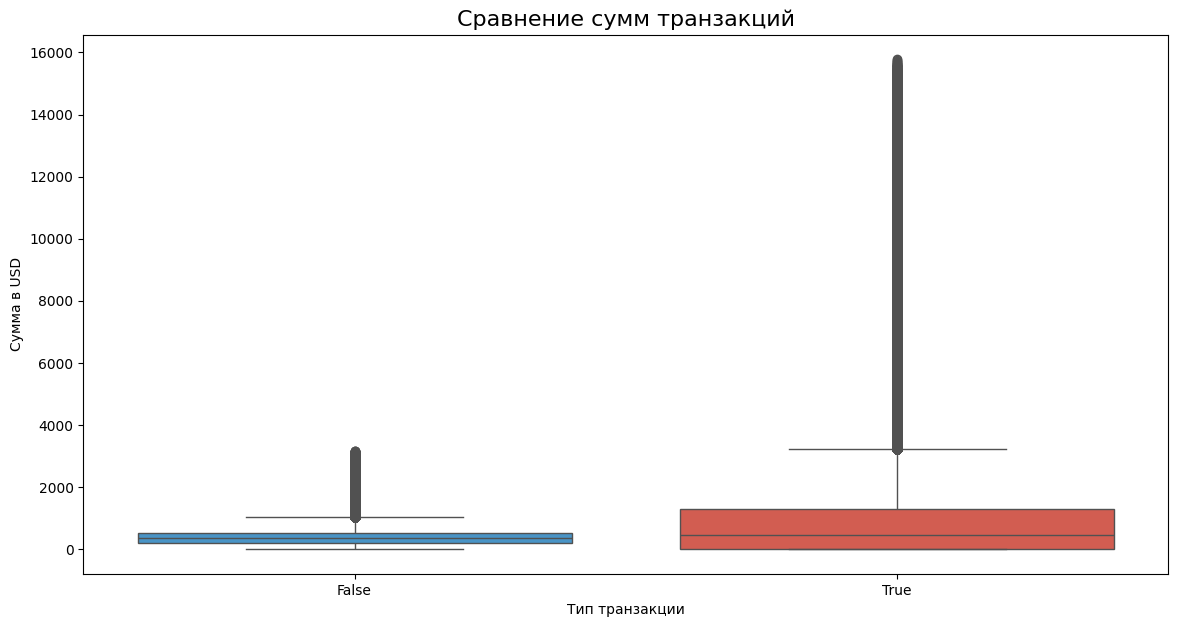

/var/folders/3f/2yvqzm4x3fjfqpn8q5ggc9c40000gn/T/ipykernel_24757/2109923030.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='amount_usd', x='is_fraud', palette=colors.values())


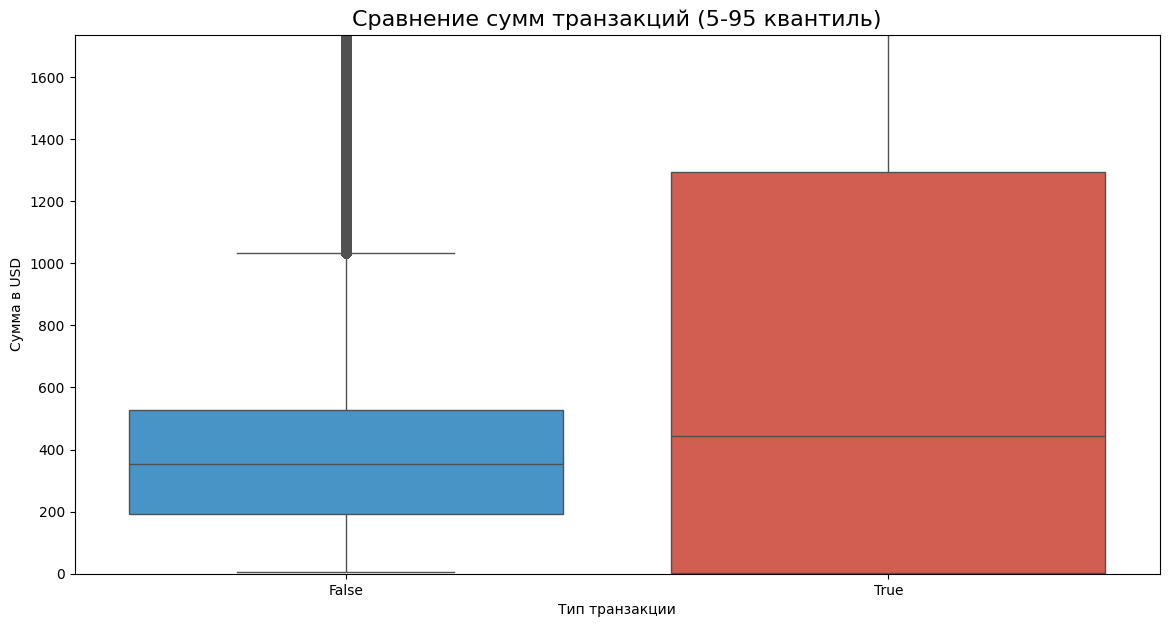

In [20]:
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='amount_usd', hue='is_fraud', log_scale=False, bins=100, multiple='stack', palette=colors.values())
plt.title('Распределение суммы транзакций в USD', fontsize=16)
plt.xlabel('Сумма в USD (log scale)')
plt.ylabel('Количество транзакций')
plt.show()
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='amount_usd', hue='is_fraud', log_scale=True, bins=100, multiple='stack', palette=colors.values())
plt.title('Распределение суммы транзакций в USD (логарифмическая шкала)', fontsize=16)
plt.xlabel('Сумма в USD (log scale)')
plt.ylabel('Количество транзакций')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df, y='amount_usd', x='is_fraud', palette=colors.values())
plt.title('Сравнение сумм транзакций', fontsize=16)
plt.xlabel('Тип транзакции')
plt.ylabel('Сумма в USD')

plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df, y='amount_usd', x='is_fraud', palette=colors.values())
plt.title('Сравнение сумм транзакций (5-95 квантиль)', fontsize=16)
plt.xlabel('Тип транзакции')
plt.ylabel('Сумма в USD')
plt.ylim(0, df['amount_usd'].quantile(0.95))
plt.show()

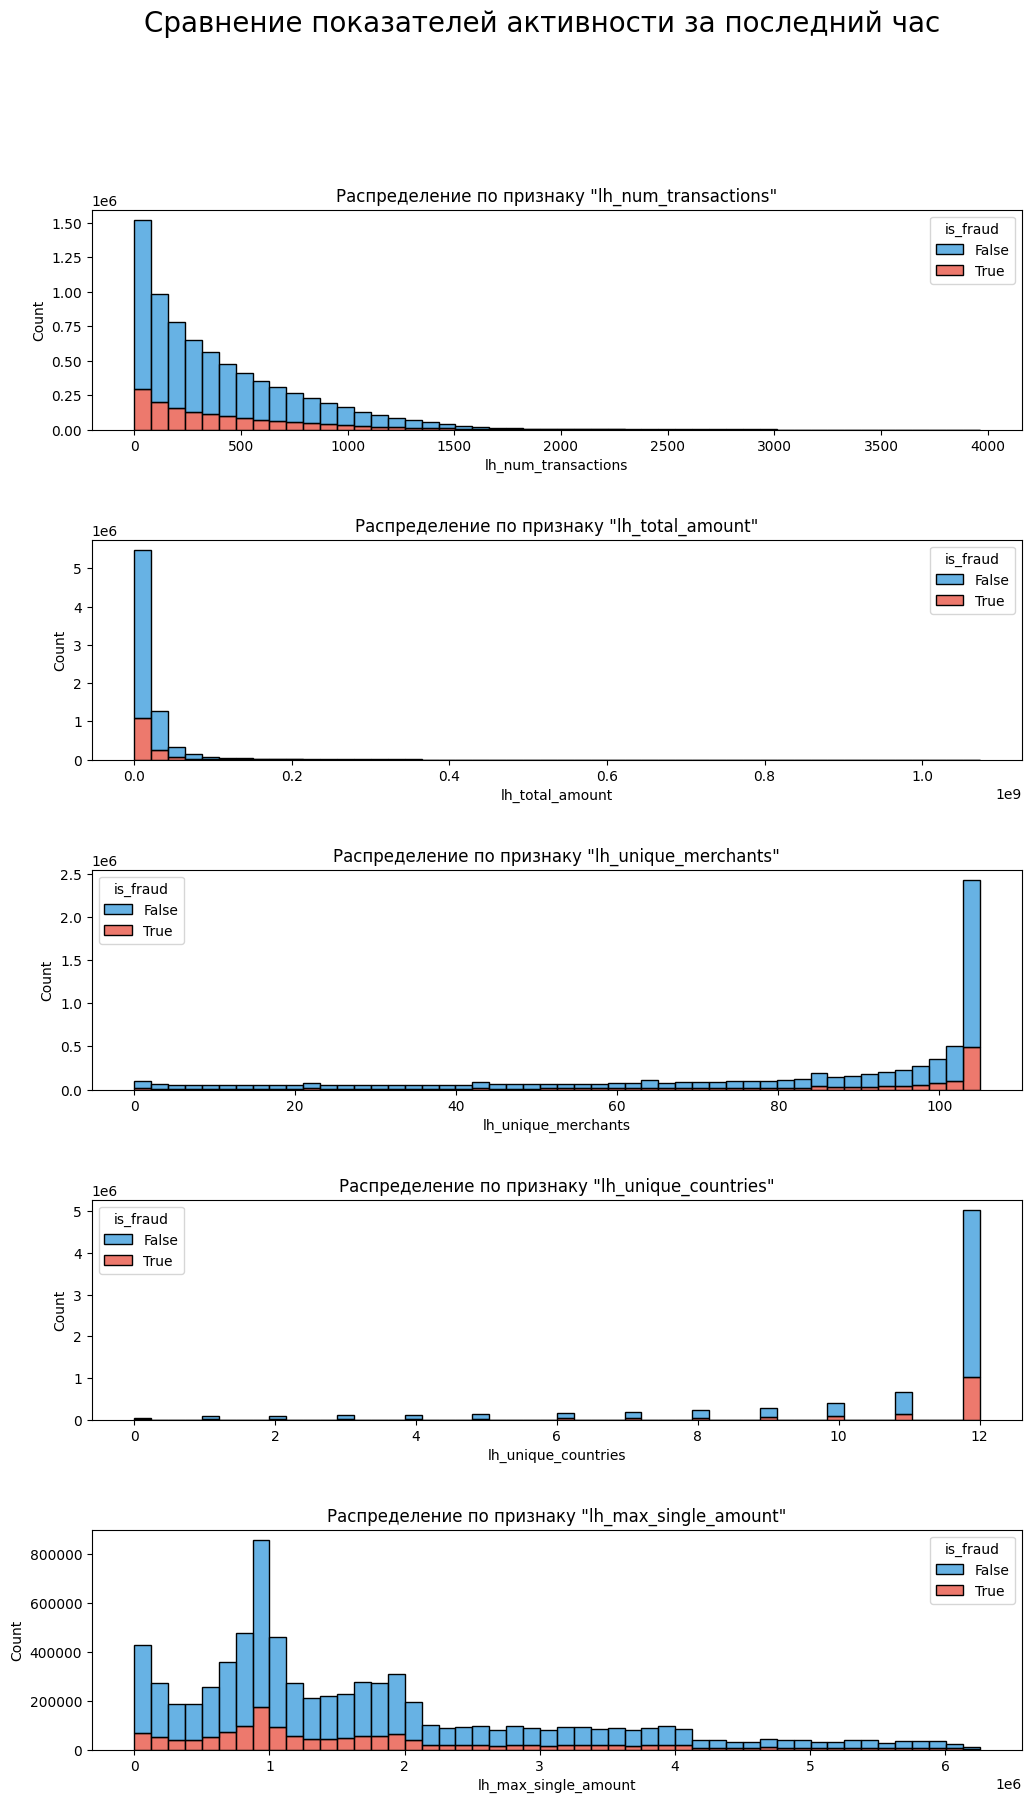

In [21]:
lh_features = ['lh_num_transactions', 'lh_total_amount', 'lh_unique_merchants', 'lh_unique_countries', 'lh_max_single_amount']
fig, axes = plt.subplots(len(lh_features), 1, figsize=(12, 20))
fig.suptitle('Сравнение показателей активности за последний час', fontsize=20)
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(lh_features):
    sns.histplot(ax=axes[i], data=df, x=feature, hue='is_fraud', bins=50,  multiple='stack', palette=colors.values())
    axes[i].set_title(f'Распределение по признаку "{feature}"')


plt.show()

In [22]:
df[df.select_dtypes(include=['object']).columns.tolist()].nunique()

transaction_id        7477306
customer_id              4869
vendor_category             8
vendor_type                17
vendor                    105
currency                   11
country                    12
city                       11
city_size                   2
card_type                   5
device                      9
channel                     3
device_fingerprint     785462
ip_address            7477187
date                       31
day_of_week                 7
dtype: int64

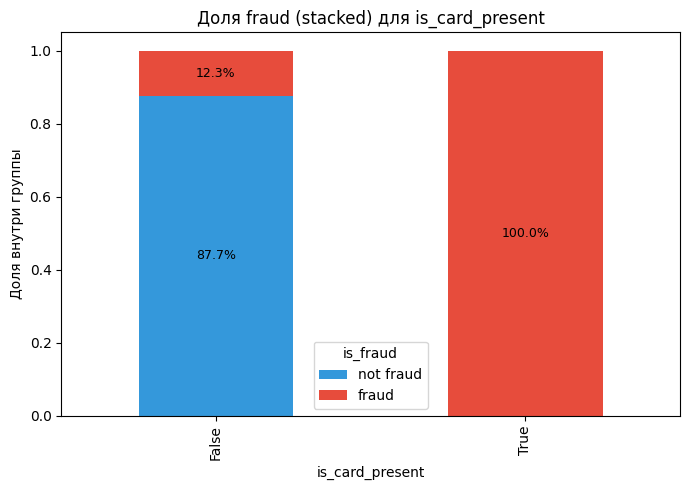

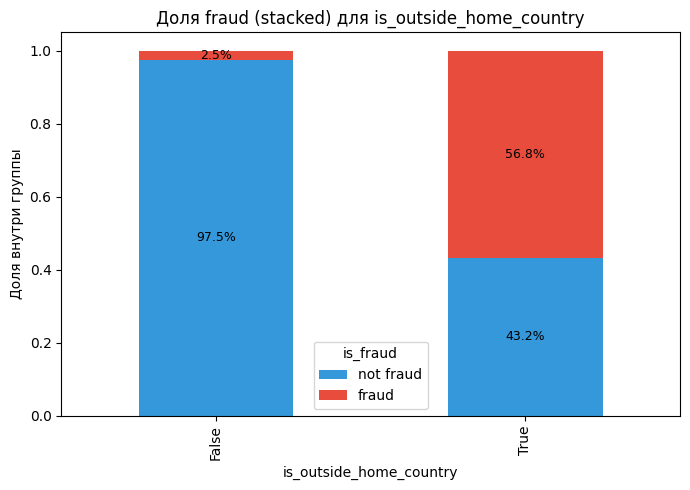

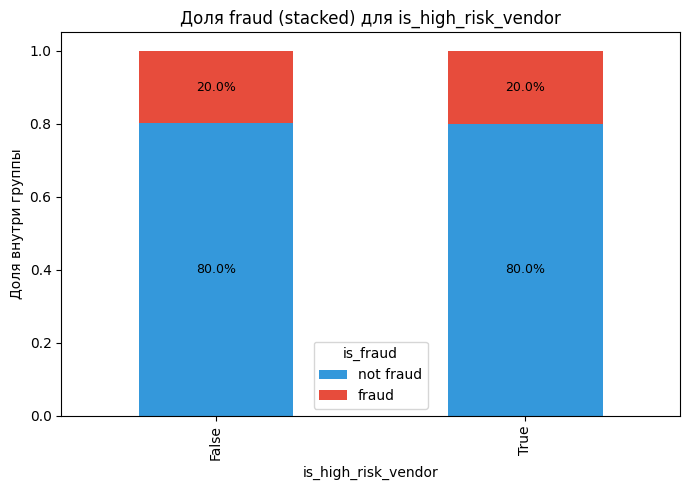

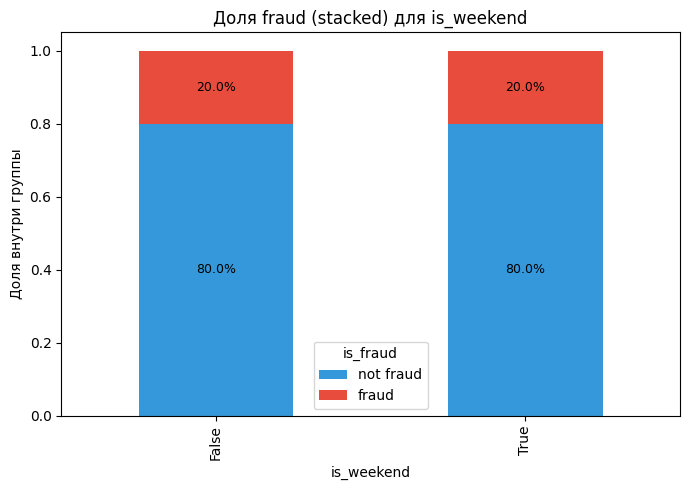

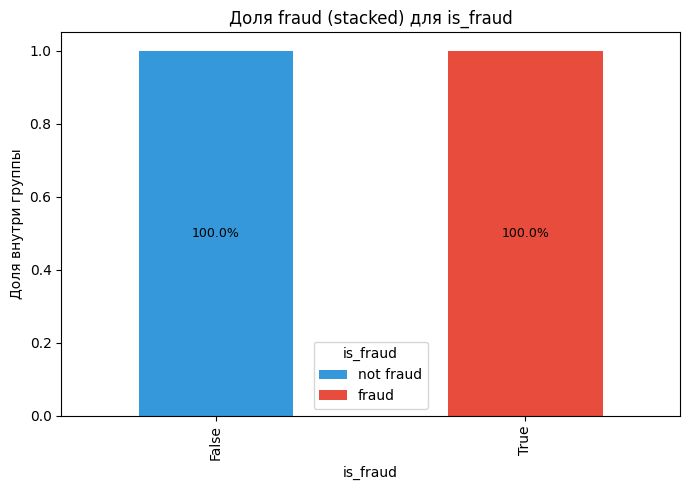

In [23]:
def bool_labels(s, yes='True', no='False'):
    return s.map({True: yes, False: no, 1: yes, 0: no}).astype('category')

def plot_bool_vs_fraud_stacked(bool_col):
    ct = pd.crosstab(bool_labels(df[bool_col]), df['is_fraud'])
    ct_norm = ct.div(ct.sum(axis=1), axis=0)  
    ax = ct_norm.plot(kind='bar', stacked=True, figsize=(7,5), color=colors.values())

    plt.title(f'Доля fraud (stacked) для {bool_col}')
    plt.ylabel('Доля внутри группы')
    plt.legend(title='is_fraud', labels=[f'not fraud', 'fraud'])

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()

        if height > 0.01:  
            x = p.get_x() + width/2
            y = p.get_y() + height/2
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=9, color='black')

    plt.tight_layout()
    plt.show()

bool_columns = df.select_dtypes(include=['bool']).columns.tolist()

for bool_column in bool_columns:
    plot_bool_vs_fraud_stacked(bool_column)  

In [24]:
# def analyze_categorical_feature(feature, bool_feature='is_fraud'):
#     plt.figure(figsize=(14, 10))
#     ax = sns.countplot(data=df, y=feature, hue=bool_feature, palette=colors.values())
#     plt.title(f'Распределение по категориям "{feature} в зависимости от {bool_feature}"', fontsize=16)
#     plt.xlabel('Количество транзакций')
#     plt.ylabel(feature)
#     plt.legend(title=bool_feature)
#     plt.margins(y=0.0125)
#     plt.tight_layout()

#     grouped = df.groupby([feature, bool_feature]).size().unstack(fill_value=0)

#     categories = [t.get_text() for t in ax.get_yticklabels()]
#     centers = ax.get_yticks()

#     legend_labels = [t.get_text() for t in ax.get_legend().get_texts()]
#     str_to_val = {str(c): c for c in grouped.columns}
#     hue_order = [str_to_val.get(lbl) for lbl in legend_labels] 

#     if len(ax.patches) > 0:
#         bar_h = ax.patches[0].get_height()
#     else:
#         bar_h = 0.8  

#     n_hue = len(legend_labels)
#     offsets = (np.arange(n_hue) - (n_hue - 1) / 2.0) * bar_h

#     x_offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01

#     for i, cat in enumerate(categories):
#         if cat not in grouped.index:
#             continue
#         cat_total = grouped.loc[cat].sum()

#         for j, lbl in enumerate(legend_labels):
#             hue_val = hue_order[j]
#             count = 0
#             if hue_val is not None and hue_val in grouped.columns:
#                 count = int(grouped.loc[cat, hue_val])
#             pct = (count / cat_total * 100) if cat_total > 0 else 0.0

#             y = centers[i] + offsets[j]
#             if pct > 0.1:
#                 txt = f'{pct:.1f}%'
#                 ax.text(count + x_offset, y, txt, va='center', fontsize=9)

#     plt.tight_layout()
#     plt.show()
# obj_columns = list(
#             set(df.select_dtypes(include=['object']).columns.tolist()) 
#             - set(['transaction_id', 'customer_id', 'date', 'device_fingerprint', 'ip_address', 'vendor'])
#             )
# bool_columns = df.select_dtypes(include=['bool']).columns.tolist()

# for bool_column in bool_columns:
#     for obj in obj_columns:
#         analyze_categorical_feature(obj, bool_column)  

In [25]:
ip_fraud_analysis = (
    df.groupby('ip_address')
    .agg(
        total_transactions=('transaction_id', 'count'),
        fraud_transactions=('is_fraud', 'sum')
    )
    .reset_index()
)

ip_fraud_analysis['fraud_percentage'] = (
    ip_fraud_analysis['fraud_transactions'] / ip_fraud_analysis['total_transactions'] * 100
)

In [26]:
ip_for_ban = ip_fraud_analysis[
                            (ip_fraud_analysis['fraud_transactions'] > 0) 
                            & ((ip_fraud_analysis['total_transactions'] > 1))
                            ].sort_values(by=['total_transactions','fraud_percentage'], ascending=False)

ip_for_ban

,ip_address,total_transactions,fraud_transactions,fraud_percentage
3068846,193.254.92.164,3,1,33.333333
24874,1.65.117.17,2,2,100.000000
59315,100.103.61.138,2,2,100.000000
70689,100.194.198.28,2,2,100.000000
109608,101.38.222.231,2,2,100.000000
...,...,...,...,...
7449454,99.111.225.242,2,1,50.000000
7457687,99.177.129.255,2,1,50.000000
7458553,99.183.35.92,2,1,50.000000
7458802,99.185.70.254,2,1,50.000000


In [27]:
len(ip_for_ban[ip_for_ban['fraud_transactions'] == 2])

258

In [28]:
df[df['ip_address'].isin(set(ip_for_ban['ip_address']))][['ip_address', 'timestamp', 'is_fraud']].sort_values(by=['ip_address', 'timestamp'])

,ip_address,timestamp,is_fraud
3028107,1.11.180.73,2024-10-12 13:39:33.302675,False
3403681,1.11.180.73,2024-10-14 03:01:17.478829,True
1240319,1.126.23.98,2024-10-05 03:59:21.131830,True
4370577,1.126.23.98,2024-10-18 03:08:14.254029,False
2814797,1.132.114.116,2024-10-11 16:26:56.071437,False
...,...,...,...
4601417,99.185.70.254,2024-10-19 02:01:37.305468,True
4639180,99.240.25.150,2024-10-19 06:40:58.084473,True
5333034,99.240.25.150,2024-10-22 02:52:49.828260,True
541049,99.97.36.7,2024-10-02 07:21:49.295995,False


In [29]:
df[df['ip_address'] == '100.194.198.28']

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,lh_num_transactions,lh_total_amount,lh_unique_merchants,lh_unique_countries,lh_max_single_amount,date,rate_to_usd,amount_usd,hour_of_day,day_of_week
2190484,TX_4352b69e,CUST_84710,5248084047228049,2024-10-09 02:20:04.321295,Entertainment,streaming,Netflix,83.15,EUR,Germany,...,74,2.922857e+06,51,10,8.722503e+05,2024-10-09,0.911611,91.212153,2,Wednesday
2701225,TX_0c7311a8,CUST_26144,6613079539749465,2024-10-11 05:36:19.420841,Entertainment,streaming,Amazon Prime,46.47,MXN,Mexico,...,1119,5.953873e+07,105,12,4.762641e+06,2024-10-11,19.457569,2.388274,5,Friday


In [30]:
# ip - гнилая темка, может быть сразу в нескольких странах один и тот же ip при оплате на месте
unique_country_per_ip_present = df[
    df['is_card_present'] == 1
    ].groupby('ip_address')['country'].nunique().rename('unique_country').reset_index().sort_values(by='unique_country',ascending=False)
unique_country_per_ip_present

,ip_address,unique_country
453142,29.209.112.1,2
169284,159.118.217.180,2
585692,76.186.254.57,2
131134,145.135.19.114,2
161639,156.130.192.8,2
...,...,...
217009,175.65.89.3,1
217010,175.66.100.68,1
217011,175.66.106.19,1
217012,175.66.136.21,1


In [31]:
len(unique_country_per_ip_present[unique_country_per_ip_present['unique_country'] > 1]) /len(unique_country_per_ip_present)

5.683589939738585e-05

In [32]:
df[df['ip_address'].isin(
    set(df[df['is_fraud'] == 1]['ip_address'])
)].groupby(
    ['ip_address','is_fraud']
    )['device_fingerprint'].nunique().reset_index().describe(include='all')

,ip_address,is_fraud,device_fingerprint
count,1496564,1496564,1.496564e+06
unique,1494461,2,NaN
top,215.32.70.243,True,NaN
freq,2,1494461,NaN
mean,NaN,NaN,1.000173e+00
std,NaN,NaN,1.315421e-02
min,NaN,NaN,1.000000e+00
25%,NaN,NaN,1.000000e+00
50%,NaN,NaN,1.000000e+00
75%,NaN,NaN,1.000000e+00


In [33]:
df.groupby('is_fraud').agg(
    unique=('device_fingerprint', 'nunique'), 
    cnt=('device_fingerprint', 'count'))

,unique,cnt
is_fraud,,
False,9969,5989047
True,775493,1494719


In [34]:
set(df[df['is_fraud'] == 1]['device_fingerprint']) & set(df[df['is_fraud'] == 0]['device_fingerprint']) 

set()

In [35]:
df.customer_id.nunique() ,  df.transaction_id.nunique() , df.transaction_id.nunique() / df.customer_id.nunique()

(4869, 7477306, 1535.6964469090162)

In [36]:
df.groupby('is_fraud').agg(
    unique=('customer_id', 'nunique'), 
    cnt=('customer_id', 'count'))

,unique,cnt
is_fraud,,
False,4869,5989047
True,4869,1494719


In [37]:
set(df[df['is_fraud'] == 0]['customer_id']) == set(df[df['is_fraud'] == 1]['customer_id'])

True

In [38]:
unique_finger_per_customer = df.groupby(['customer_id', 'is_fraud'])['device_fingerprint'].nunique().rename('unique_finger').reset_index()
unique_finger_per_customer

,customer_id,is_fraud,unique_finger
0,CUST_10000,False,3
1,CUST_10000,True,311
2,CUST_10018,False,3
3,CUST_10018,True,256
4,CUST_10022,False,1
...,...,...,...
9733,CUST_99952,True,340
9734,CUST_99957,False,1
9735,CUST_99957,True,244
9736,CUST_99971,False,3


array([[<Axes: title={'center': 'False'}>,
        <Axes: title={'center': 'True'}>]], dtype=object)

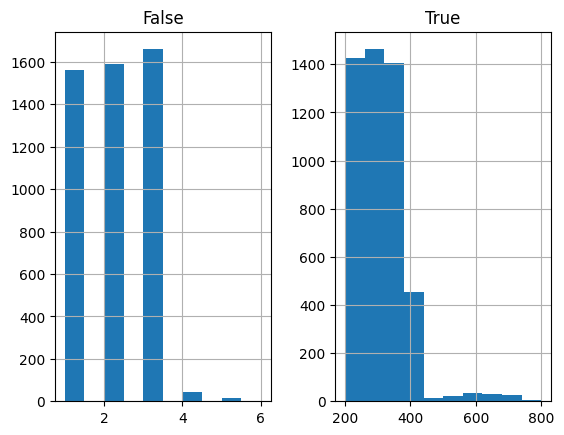

In [39]:
df.groupby(
    ['customer_id', 'is_fraud']
    )['device_fingerprint'].nunique().rename('unique_finger').reset_index().pivot_table(
        index=['customer_id'],
        columns='is_fraud',
        values='unique_finger',
        fill_value=0
    ).hist()

In [40]:
(
    unique_finger_per_customer[unique_finger_per_customer['is_fraud'] == 0]['unique_finger'].mean(),
    unique_finger_per_customer[unique_finger_per_customer['is_fraud'] == 1]['unique_finger'].mean(),
)

(np.float64(2.047443006777572), np.float64(306.9435202300267))

In [41]:
(
    unique_finger_per_customer[unique_finger_per_customer['is_fraud'] == 0]['unique_finger'].median(),
    unique_finger_per_customer[unique_finger_per_customer['is_fraud'] == 1]['unique_finger'].median(),
)

(np.float64(2.0), np.float64(301.0))

In [42]:
df[df['is_fraud'] == 1].groupby(
    ['device_fingerprint']
    )['customer_id'].nunique().rename('unique_customer_id').reset_index().sort_values(
        by='unique_customer_id', ascending=False)

,device_fingerprint,unique_customer_id
296342,61cb6463141119abd41762825ad4f9cd,10
270318,5944cb714f20b1f0252ed4868883fa7f,10
339964,705065595f56ee279dedba7f4269d5b0,10
722128,ee850b8c0e95c7f0c1123449c605420e,10
404599,85cd1c1bf361609d72163ae6a979d987,10
...,...,...
360754,7739af1de3175dfc9fc5281975e509f2,1
360752,773981108f6c0a2de4e4bf54e95e7baa,1
360751,77397971db7cfab9633924c13050bf62,1
360749,773953cea01444f2ddeb972aef548694,1


array([[<Axes: title={'center': 'unique_customer_id'}>]], dtype=object)

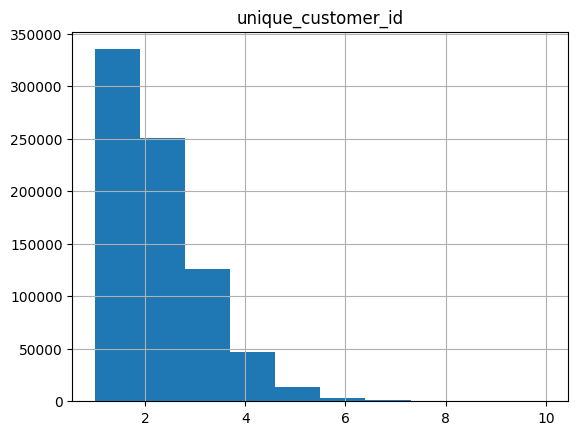

In [43]:
df[df['is_fraud'] == 1].groupby(
    ['device_fingerprint']
    )['customer_id'].nunique().rename('unique_customer_id').reset_index().hist()

In [44]:
df[df['is_fraud'] == 1].groupby(
    ['device_fingerprint']
    )['customer_id'].nunique().rename('unique_customer_id').reset_index()['unique_customer_id'].median()

np.float64(2.0)

In [45]:
check_customer_chanel_country = df.groupby(['customer_id', 'is_fraud', 'channel', 'date'])[['country', 'device_fingerprint']].nunique().reset_index()
check_customer_chanel_country

,customer_id,is_fraud,channel,date,country,device_fingerprint
0,CUST_10000,False,mobile,2024-09-30,2,1
1,CUST_10000,False,mobile,2024-10-01,2,1
2,CUST_10000,False,mobile,2024-10-02,2,1
3,CUST_10000,False,mobile,2024-10-03,2,1
4,CUST_10000,False,mobile,2024-10-04,3,1
...,...,...,...,...,...,...
625558,CUST_99971,True,web,2024-10-25,1,1
625559,CUST_99971,True,web,2024-10-26,2,2
625560,CUST_99971,True,web,2024-10-27,1,1
625561,CUST_99971,True,web,2024-10-28,2,2


In [46]:
df[(df['is_fraud'] == 1) & (df['channel'] == 'pos')].groupby(
    ['device_fingerprint','date']).agg(
        country_set=('country','unique'),
        fraud_transactions_cnt=('transaction_id','count')
    ).reset_index()

,device_fingerprint,date,country_set,fraud_transactions_cnt
0,0000193a728fd00b6cff91b8840bbf8d,2024-10-23,[Russia],1
1,000053b1e684c9e7ea73727b2238ce18,2024-10-07,[Germany],1
2,000053b1e684c9e7ea73727b2238ce18,2024-10-12,[Russia],1
3,000053b1e684c9e7ea73727b2238ce18,2024-10-13,[Canada],1
4,00007c55a9a7591b98a76d79216c9112,2024-10-03,[Mexico],1
...,...,...,...,...
644259,ffff8e040521f62207881376ecc964d5,2024-09-30,[Russia],1
644260,ffffbd0f062adb4c4a307c5a05f7b0ad,2024-10-23,[Russia],1
644261,ffffbd0f062adb4c4a307c5a05f7b0ad,2024-10-25,[Brazil],1
644262,fffffa6bed6b7780465149fab05cf406,2024-10-08,[Russia],1


In [47]:
check_finger_unique_country_date_and_trans_cnt = \
    df[(df['is_fraud'] == 1) & (df['channel'] == 'pos')].groupby(
        ['device_fingerprint']).agg(
            unique_country=('country','nunique'),
            unique_date = ('date', 'nunique'),
            fraud_transactions_cnt=('transaction_id','count'),
            sum_outside_home=('is_outside_home_country','sum')
        ).reset_index().sort_values(by='unique_date', ascending=False)

In [48]:
check_finger_unique_country_date_and_trans_cnt[
    check_finger_unique_country_date_and_trans_cnt['unique_date'] > 1
]

,device_fingerprint,unique_country,unique_date,fraud_transactions_cnt,sum_outside_home
406909,da0a86c97ecfe2fb0312e5f7596784f4,5,7,7,6
203869,6d06cf313810540cfca975f3affe800d,4,6,6,5
128663,44ba4fd1322cfca08daedf9e38cd39be,5,6,6,6
134348,47d22b857c6ed4d8bb17fe93a5876605,3,6,6,6
473988,fd8a9eb514f6c0d7b67510b4742d93ee,3,6,6,6
...,...,...,...,...,...
301064,a15b2215709bd4fd5526b6e6f689d281,2,2,2,1
8284,047f1f81e7a7c3b9087cd8a9391f8270,2,2,2,2
243772,82a9fd2f6ce51ff5898acd553a2b70fe,1,2,2,2
67807,2440c7b87ef6b3cbe4adacdd3621d4e5,2,2,2,2


In [49]:
df[df['is_fraud'] == 1].groupby(
    ['device_fingerprint','channel']
    )['transaction_id'].count().rename('fraud_transactions_cnt').reset_index()

,device_fingerprint,channel,fraud_transactions_cnt
0,0000104cd168386a335ba6bf6e32219d,web,2
1,0000193a728fd00b6cff91b8840bbf8d,pos,1
2,000053b1e684c9e7ea73727b2238ce18,pos,3
3,000053b1e684c9e7ea73727b2238ce18,web,1
4,00005d011db80a956aab176cc94d1d37,web,5
...,...,...,...
1153892,ffffda8ada4827900cbf65fd20281080,web,1
1153893,fffffa6bed6b7780465149fab05cf406,mobile,3
1153894,fffffa6bed6b7780465149fab05cf406,pos,1
1153895,fffffa6bed6b7780465149fab05cf406,web,1


In [50]:
df_channel_and_device = df[df['is_fraud'] == 1].groupby(
'channel')['transaction_id'].count().rename('fraud_transactions_cnt').reset_index()
df_channel_and_device

,channel,fraud_transactions_cnt
0,mobile,281150
1,pos,651047
2,web,562522


In [51]:
df.groupby(
    ['is_fraud', 'channel']
    )['transaction_id'].count().rename('transaction_per_channel').reset_index().pivot_table(
        index=['is_fraud'],
        columns='channel',
        values='transaction_per_channel',
        fill_value=0
    )

channel,mobile,pos,web
is_fraud,,,
False,1988428.0,0.0,4000619.0
True,281150.0,651047.0,562522.0


In [52]:
df.groupby(
    ['is_outside_home_country', 'channel']
    )['transaction_id'].count().rename('transaction_per_channel').reset_index().pivot_table(
        index=['is_outside_home_country'],
        columns='channel',
        values='transaction_per_channel',
        fill_value=0
    )

channel,mobile,pos,web
is_outside_home_country,,,
False,1662953.0,55236.0,3355416.0
True,606625.0,595811.0,1207725.0


In [53]:
len(set(df[(df['is_fraud'] == 0) & (df['is_outside_home_country'] == 1)].customer_id)) / len(set(df.customer_id))

1.0

In [54]:
df[df['is_fraud'] == 1].groupby(
    ['device_fingerprint', 'channel']
    )['is_fraud'].sum().rename('fraud_per_channel').reset_index().pivot_table(
        index=['device_fingerprint'],
        columns='channel',
        values='fraud_per_channel',
        fill_value=0
    )

channel,mobile,pos,web
device_fingerprint,,,
0000104cd168386a335ba6bf6e32219d,0.0,0.0,2.0
0000193a728fd00b6cff91b8840bbf8d,0.0,1.0,0.0
000053b1e684c9e7ea73727b2238ce18,0.0,3.0,1.0
00005d011db80a956aab176cc94d1d37,0.0,0.0,5.0
00007c55a9a7591b98a76d79216c9112,0.0,2.0,1.0
...,...,...,...
ffffb8de2d77567f452ad766471a9e5e,1.0,0.0,0.0
ffffbd0f062adb4c4a307c5a05f7b0ad,0.0,2.0,0.0
ffffda8ada4827900cbf65fd20281080,0.0,0.0,1.0


array([[<Axes: title={'center': 'mobile'}>,
        <Axes: title={'center': 'pos'}>],
       [<Axes: title={'center': 'web'}>, <Axes: >]], dtype=object)

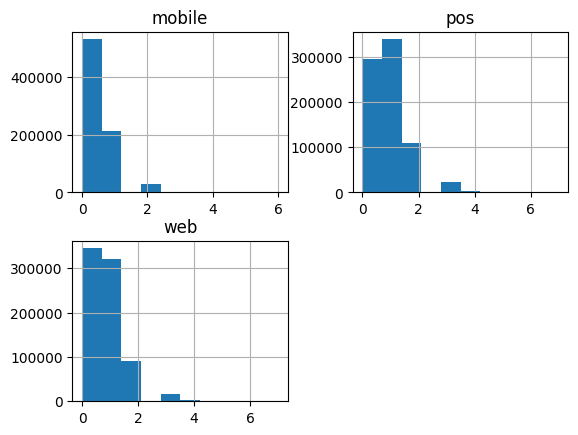

In [55]:
df[df['is_fraud'] == 1].groupby(
    ['device_fingerprint', 'channel']
    )['is_fraud'].sum().rename('fraud_per_channel').reset_index().pivot_table(
        index=['device_fingerprint'],
        columns='channel',
        values='fraud_per_channel',
        fill_value=0
    ).hist()

In [56]:
df[(df['is_fraud'] == 1)].groupby('is_card_present').agg(
    sum_amount_usd=('amount_usd','sum'),
    cnt_transactions=('transaction_id','count'),
    unique_finger=('device_fingerprint','nunique')
    ).reset_index()

,is_card_present,sum_amount_usd,cnt_transactions,unique_finger
0,False,7.382240e+08,843672,569827
1,True,5.690673e+08,651047,478640


In [57]:
# Проверка того, что сначала был оффлайн фрод, а потом онлайн
# Гипотеза: Проверили работспособность карт в оффлайне, а потом начали жестко фродить в онлайне

df['offline_fraud'] = (df['is_card_present'] == True) & (df['is_fraud'] == True)
df['online_fraud']  = (df['is_card_present'] == False) & (df['is_fraud'] == True)

first_off = (df[df['offline_fraud']]
             .sort_values('timestamp')
             .groupby('customer_id')['timestamp']
             .first()
             .rename('first_offline_ts'))

first_on = (df[df['online_fraud']]
            .sort_values('timestamp')
            .groupby('customer_id')['timestamp']
            .first()
            .rename('first_online_ts'))


users = (pd.DataFrame({'customer_id': df['customer_id'].unique()})
         .merge(first_off.reset_index(), on='customer_id', how='left')
         .merge(first_on.reset_index(), on='customer_id', how='left'))

users['offline_then_online'] = (users['first_offline_ts'].notna() &
                               users['first_online_ts'].notna() &
                               (users['first_online_ts'] > users['first_offline_ts']))


total_users = len(users)
users_with_sequence = int(users['offline_then_online'].sum())
prop_all = users_with_sequence / total_users 



print(f"Всего пользователей: {total_users}")
print(f"Пользователей с последовательностью offline → online: {users_with_sequence} ({prop_all:.3%} от всех пользователей)")

Всего пользователей: 4869
Пользователей с последовательностью offline → online: 2157 (44.301% от всех пользователей)


array([[<Axes: title={'center': 'cnt_transaction'}>,
        <Axes: title={'center': 'unique_country'}>]], dtype=object)

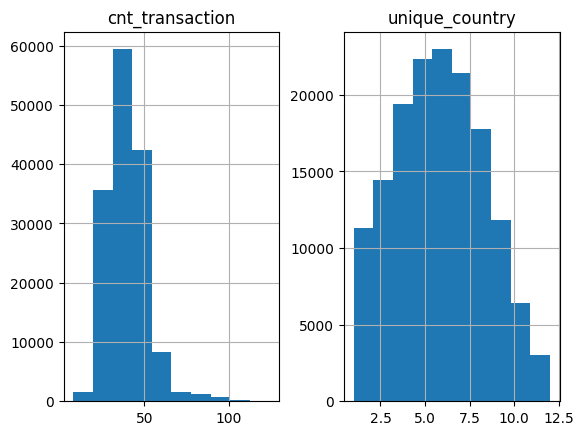

In [58]:
df[
    (df['channel'] != 'pos') 
    & (df['is_fraud'] == 0)
    ].groupby(
        ['customer_id', 
        'date']
        ).agg(
            cnt_transaction=('transaction_id', 'count'),
            unique_country=('country', 'nunique')
            ).reset_index().hist()

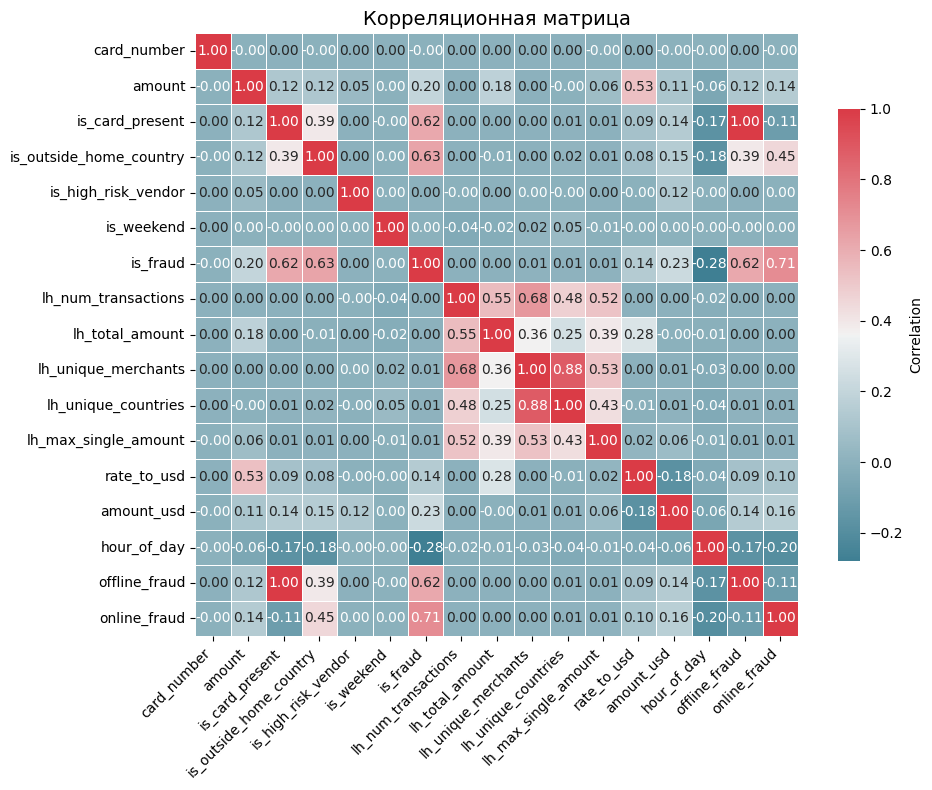

In [59]:
corr = df.select_dtypes(include=[np.number, 'bool']).corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)   

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap=cmap,
    annot=True,           
    fmt='.2f',           
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.75, 'label': 'Correlation'}
)
plt.title('Корреляционная матрица', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 5) Итог


In [60]:
fraudulent_fingerprints = set(df_transactions[df_transactions['is_fraud'] == True]['device_fingerprint'])
df_sorted = df_transactions.sort_values(by='timestamp')

df_sorted['transaction_rank'] = df_sorted.groupby('device_fingerprint').cumcount() + 1
fraud_fp_transactions = df_sorted[df_sorted['device_fingerprint'].isin(fraudulent_fingerprints)]

preventable_fraud_df = fraud_fp_transactions[
    (fraud_fp_transactions['is_fraud'] == True) &
    (fraud_fp_transactions['transaction_rank'] >= 2)
]

total_fraud_amount = df_transactions[df_transactions['is_fraud'] == True]['amount'].sum()
saved_money = preventable_fraud_df['amount'].sum()
leaked_fraud_amount = total_fraud_amount - saved_money

print(f"💰 Общая сумма мошеннических операций: ${total_fraud_amount:,.2f}")
print(f"🔥 Сумма фрода от ПЕРВЫХ атак (неизбежные потери): ${leaked_fraud_amount:,.2f}")
print(f"🛡 Потенциально сэкономленные деньги (при блокировке после первой атаки): ${saved_money:,.2f}")

💰 Общая сумма мошеннических операций: $177,533,141,479.02
🔥 Сумма фрода от ПЕРВЫХ атак (неизбежные потери): $92,074,027,959.15
🛡 Потенциально сэкономленные деньги (при блокировке после первой атаки): $85,459,113,519.87
